# <font color=red> Course Description </font>
Machine learning is the field that teaches machines and computers to learn from existing data to make predictions on new data: Will a tumor be benign or malignant? Which of your customers will take their business elsewhere? Is a particular email spam? In this course, you'll learn how to use Python to perform supervised learning, an essential component of machine learning. You'll learn how to build predictive models, tune their parameters, and determine how well they will perform with unseen data—all while using real world datasets. You'll be using scikit-learn, one of the most popular and user-friendly machine learning libraries for Python.

In this course four chapters:
#### 1- Classification
#### 2- Regression 
#### 3- Fine-tuning your model
#### 4- Preprocessing and pipelines

**************************************************************************************

# 1- Classification
In this chapter, you will be introduced to classification problems and learn how to solve them using supervised learning techniques. And you’ll apply what you learn to a political dataset, where you classify the party affiliation of United States congressmen based on their voting records.

## 1-3 Numerical EDA


In this chapter, you'll be working with a dataset obtained from the UCI Machine Learning Repository consisting of votes made by US House of Representatives Congressmen. Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that your focus can be directed towards understanding how to train and evaluate supervised learning models. Once you have mastered these fundamentals, you will be introduced to preprocessing techniques in Chapter 4 and have the chance to apply them there yourself - including on this very same dataset!

Before thinking about what supervised learning models you can apply to this, however, you need to perform Exploratory data analysis (EDA) in order to understand the structure of the data. 

Get started with your EDA now by exploring this voting records dataset numerically. It has been pre-loaded for you into a DataFrame called df. Use pandas' .head(), .info(), and .describe() methods

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv('datasets/vote_csv.csv')

In [3]:
df.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN,republican
2,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y,democrat


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
handicapped-infants                       423 non-null object
water-project-cost-sharing                387 non-null object
adoption-of-the-budget-resolution         424 non-null object
physician-fee-freeze                      424 non-null object
el-salvador-aid                           420 non-null object
religious-groups-in-schools               424 non-null object
anti-satellite-test-ban                   421 non-null object
aid-to-nicaraguan-contras                 420 non-null object
mx-missile                                413 non-null object
immigration                               428 non-null object
synfuels-corporation-cutback              414 non-null object
education-spending                        404 non-null object
superfund-right-to-sue                    410 non-null object
crime                                     418 non-null object
duty-free-exports          

## 1-4 Visual EDA


The Numerical EDA you did in the previous exercise gave you some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some visual EDA will give you an even better understanding of the data. In the video, Hugo used the scatter_matrix() function on the Iris data for this purpose. However, you may have noticed in the previous exercise that all the features in this dataset are binary; that is, they are either 0 or 1. So a different type of plot would be more useful here, such as Seaborn's countplot

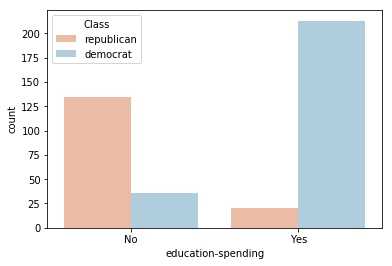

In [5]:
plt.figure()
sns.countplot(x='education-spending', hue='Class', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In sns.countplot(), we specify the x-axis data to be 'education', and hue to be 'party'. Recall that 'party' is also our target variable. So the resulting plot shows the difference in voting behavior between the two parties for the 'education' bill, with each party colored differently. We manually specified the color to be 'RdBu', as the Republican party has been traditionally associated with red, and the Democratic party with blue.

It seems like Democrats voted resoundingly against this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

In the IPython Shell, explore the voting behavior further by generating countplots for the 'satellite' and 'missile' bills, and answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans? Be sure to begin your plotting statements for each figure with plt.figure() so that a new figure will be set up. Otherwise, your plots will be overlayed onto the same figure.

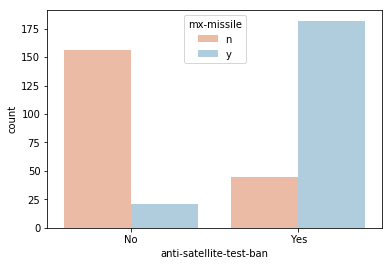

In [6]:
plt.figure()
sns.countplot(x='anti-satellite-test-ban', hue='mx-missile', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

## 1-6 k-Nearest Neighbors: Fit


Having explored the Congressional voting records dataset, it is time now to build your first classifier. In this exercise, you will fit a k-Nearest Neighbors classifier to the voting dataset, which has once again been pre-loaded for you into a DataFrame <code>df</code>. </p>
<p>In the video, Hugo discussed the importance of ensuring your data adheres to the format required by the scikit-learn API. The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. We have done this for you in this exercise. Notice we named the feature array <code>X</code> and response variable <code>y</code>: This is in accordance with the common scikit-learn practice.</p>
<p>Your job is to create an instance of a k-NN classifier with 6 neighbors (by specifying the <code>n_neighbors</code> parameter) and then fit it to the data. The data has been pre-loaded into a DataFrame called <code>df</code>.

<li>Import <code>KNeighborsClassifier</code> from <code>sklearn.neighbors</code>.</li>
<li>Create arrays <code>X</code> and <code>y</code> for the features and the target variable. Here this has been done for you. Note the use of <code>.drop()</code> to drop the target variable <code>'party'</code> from the feature array <code>X</code> as well as the use of the <code>.values</code> attribute to ensure <code>X</code> and <code>y</code> are NumPy arrays. Without using <code>.values</code>, <code>X</code> and <code>y</code> are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.</li>
<li>Instantiate a <code>KNeighborsClassifier</code> called <code>knn</code> with <code>6</code> neighbors by specifying the <code>n_neighbors</code> parameter.</li>
<li>Fit the classifier to the data using the <code>.fit()</code> method.


In [33]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Replace the 'n' with 0 and 'y' with 1
df=df.replace('n',0)
df=df.replace('y',1)

#Drop nan values
df1=df.dropna()

# Create arrays for the features and the response variable
y = df1['Class'].values
X = df1.drop('Class', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

## 1-7 k-Nearest Neighbors: Predict


Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the <code>.predict()</code> method on the <code>X</code> that was used to fit the model, but it is not a good indicator of the model&apos;s ability to generalize to new, unseen data. </p>
<p>In the next video, Hugo will discuss a solution to this problem. For now, a random unlabeled data point has been generated and is available to you as <code>X_new</code>. You will use your classifier to predict the label for this new data point, as well as on the training data <code>X</code> that the model has already seen. Using <code>.predict()</code> on <code>X_new</code> will generate 1 prediction, while using it on <code>X</code> will generate 435 predictions: 1 for each sample.</p>
<p>The DataFrame has been pre-loaded as <code>df</code>. This time, you will create the feature array <code>X</code> and target variable array <code>y</code> yourself

<li>Create arrays for the features and the target variable from <code>df</code>. As a reminder, the target variable is <code>&apos;party&apos;</code>.</li>
<li>Instantiate a <code>KNeighborsClassifier</code> with <code>6</code> neighbors.</li>
<li>Fit the classifier to the data.</li>
<li>Predict the labels of the training data, <code>X</code>.</li>
<li>Predict the label of the new data point <code>X_new</code>.</li>

In [ ]:
# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

## 1-8 Measuring model performance
(Video)

## 1-8 The digits recognition dataset



<p>Up until now, you have been performing binary classification, since the target variable had two possible outcomes. Hugo, however, got to perform
multi-class classification in the videos, where the target variable could take on three possible outcomes. Why does he get to have all the fun?!
In the following exercises, you&apos;ll be working with the <a href="http://yann.lecun.com/exdb/mnist/">MNIST</a> digits recognition dataset, which has
10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn&apos;s included datasets, and that is the one we will use in this exercise. </p>
<p>Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn&apos;s built-in datasets are of type <code>Bunch</code>, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an <code>&apos;images&apos;</code> key in addition to the <code>&apos;data&apos;</code> and <code>&apos;target&apos;</code> keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this <code>&apos;images&apos;</code> key is useful for visualizing the images, as you&apos;ll see in this exercise (for more on plotting 2D arrays, see <a href="https://www.datacamp.com/courses/introduction-to-data-visualization-with-python">Chapter 2</a> of DataCamp&apos;s course on Data Visualization with Python). On the other hand, the <code>&apos;data&apos;</code> key contains the feature array - that is, the images as a flattened array of 64 pixels.</p>
<p>Notice that you can access the keys of these <code>Bunch</code> objects in two different ways: By using the <code>.</code> notation, as in <code>digits.images</code>, or the <code>[]</code> notation, as in <code>digits[&apos;images&apos;]</code>. </p>
<p>For more on the MNIST data, check out <a href="https://campus.datacamp.com/courses/importing-data-in-python-part-1/introduction-and-flat-files-1?ex=10">this exercise</a> in Part 1 of DataCamp&apos;s Importing Data in Python course. There, the full version of the MNIST dataset is used, in which the images are 28x28. It is a famous dataset in machine learning and computer vision, and frequently used as a benchmark to evaluate the performance of a new model.</p>

<ul>
<li>Import <code>datasets</code> from <code>sklearn</code> and <code>matplotlib.pyplot</code> as <code>plt</code>.</li>
<li>Load the digits dataset using the <code>.load_digits()</code> method on <code>datasets</code>.</li>
<li>Print the keys and <code>DESCR</code> of digits.</li>
<li>Print the shape of <code>images</code> and <code>data</code> keys using the <code>.</code> notation.</li>
<li>Display the 1011th image using <code>plt.imshow()</code>. This has been done for you, so hit &apos;Submit Answer&apos; to see which handwritten digit this happens to be!</li>
</ul>

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping b

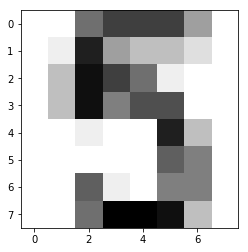

In [39]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## 1-9 Train/Test Split + Fit/Predict/Accuracy

<p>Now that you have learned about the importance of splitting your data into training and test sets, it&apos;s time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the <code>.score()</code> method.</p>

<ul>
<li>Import <code>KNeighborsClassifier</code> from <code>sklearn.neighbors</code> and <code>train_test_split</code> from <code>sklearn.model_selection</code>.</li>
<li>Create an array for the features using <code>digits.data</code> and an array for the target using <code>digits.target</code>.</li>
<li>Create stratified training and test sets using <code>0.2</code> for the size of the test set. Use a random state of <code>42</code>. Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.</li>
<li>Create a k-NN classifier with <code>7</code> neighbors and fit it to the training data.</li>
<li>Compute and print the accuracy of the classifier&apos;s predictions using the <code>.score()</code> method.</li>
</ul>

In [43]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.9833333333333333


## 1-10 Overfitting and underfitting


<p>Remember the model complexity curve that Hugo showed in the video? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.</p>

<p>The training and testing sets are available to you in the workspace as <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, <code>y_test</code>. In addition, <code>KNeighborsClassifier</code> has been imported from <code>sklearn.neighbors</code>.</p>

<li>Inside the for loop:<ul>
<li>Setup a k-NN classifier with the number of neighbors equal to <code>k</code>.</li>
<li>Fit the classifier with <code>k</code> neighbors to the training data.</li>
<li>Compute accuracy scores the training set and test set separately using the <code>.score()</code> method and assign the results to the <code>train_accuracy</code> and <code>test_accuracy</code> arrays respectively.</li></ul></li>

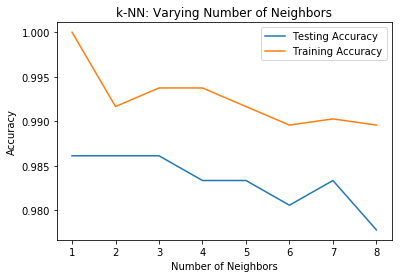

In [46]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


--------------------------------------------------------------------------------------------------

# 2- Regression

In the previous chapter, you used image and political datasets to predict binary and multiclass outcomes. But what if your problem requires a continuous outcome? Regression is best suited to solving such problems. You will learn about fundamental concepts in regression and apply them to predict the life expectancy in a given country using Gapminder data.

## 2-1 Introduction to regression


(video)

## 2-2 Which of the following is a regression problem?

Andy introduced regression to you using the Boston housing dataset. But regression models can be used in a variety of contexts to solve a variety of different problems.

Given below are four example applications of machine learning. Your job is to pick the one that is best framed as a regression problem.


Possible Answers
- An e-commerce company using labeled customer data to predict whether or not a customer will purchase a particular item.

- A healthcare company using data about cancer tumors (such as their geometric measurements) to predict whether a new tumor is benign or malignant.

- A restaurant using review data to ascribe positive or negative sentiment to a given review.

- A bike share company using time and weather data to predict the number of bikes being rented at any given hour. (_The answer_)

## 2-3 Importing data for supervised learning

<p>In this chapter, you will work with <a href="https://www.gapminder.org/data/">Gapminder</a> data that we have consolidated into one CSV file available in the workspace as <code>&apos;gapminder.csv&apos;</code>. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country&apos;s GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.</p>
<p>Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: <code>&apos;fertility&apos;</code>, which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.</p>
<p>Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy&apos;s <code>.reshape()</code> method. Don&apos;t worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.</p>

<li>Import <code>numpy</code> and <code>pandas</code> as their standard aliases.</li>
<li>Read the file <code>&apos;gapminder.csv&apos;</code> into a DataFrame <code>df</code> using the <code>read_csv()</code> function.</li>
<li>Create array <code>X</code> for the <code>&apos;fertility&apos;</code> feature  and array <code>y</code> for the <code>&apos;life&apos;</code> target variable.</li>
<li>Reshape the arrays by using the <code>.reshape()</code> method and passing in <code>-1</code> and <code>1</code>.</li>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [13]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('datasets/gm_2008_region.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

print(type(X), type(y))
X,y

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


(array([2.73, 6.43, 2.24, 1.4 , 1.96, 1.41, 1.99, 1.89, 2.38, 1.83, 1.42,
        1.82, 2.91, 5.27, 2.51, 3.48, 2.86, 1.9 , 1.43, 6.04, 6.48, 3.05,
        5.17, 1.68, 6.81, 1.89, 2.43, 5.05, 5.1 , 1.91, 4.91, 1.43, 1.5 ,
        1.89, 3.76, 2.73, 2.95, 2.32, 5.31, 5.16, 1.62, 2.74, 1.85, 1.97,
        4.28, 5.8 , 1.79, 1.37, 4.19, 1.46, 4.12, 5.34, 5.25, 2.74, 3.5 ,
        3.27, 1.33, 2.12, 2.64, 2.48, 1.88, 2.  , 2.92, 1.39, 2.39, 1.34,
        2.51, 4.76, 1.5 , 1.57, 3.34, 5.19, 1.42, 1.63, 4.79, 5.78, 2.05,
        2.38, 6.82, 1.38, 4.94, 1.58, 2.35, 1.49, 2.37, 2.44, 5.54, 2.05,
        2.9 , 1.77, 2.12, 2.72, 7.59, 6.02, 1.96, 2.89, 3.58, 2.61, 4.07,
        3.06, 2.58, 3.26, 1.33, 1.36, 2.2 , 1.34, 1.49, 5.06, 5.11, 1.41,
        5.13, 1.28, 1.31, 1.43, 7.06, 2.54, 1.42, 2.32, 4.79, 2.41, 3.7 ,
        1.92, 1.47, 3.7 , 5.54, 1.48, 4.88, 1.8 , 2.04, 2.15, 6.34, 1.38,
        1.87, 2.07, 2.11, 2.46, 1.86, 5.88, 3.85]),
 array([75.3, 58.3, 75.5, 72.5, 81.5, 80.4, 70.6, 72.2, 68.4

In [21]:
#Reshape
X=X.reshape(-1,1)
y=y.reshape(-1,1)

print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

print(type(X), type(y))
X_fertility=X #Will Used next 

Dimensions of y before reshaping: (139, 1)
Dimensions of X before reshaping: (139, 1)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


## 2-4 Exploring the Gapminder data

<p>As always, it is important to explore your data before building models. On the right, we have constructed a heatmap showing the correlation between the different features of the Gapminder dataset, which has been pre-loaded into a DataFrame as <code>df</code> and is available for exploration in the IPython Shell. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with <code>life</code>, and which ones are negatively correlated? Does this match your intuition? </p>
<p>Then, in the IPython Shell, explore the DataFrame using pandas methods such as <code>.info()</code>, <code>.describe()</code>, <code>.head()</code>. </p>
<p>In case you are curious, the heatmap was generated using <a href="http://seaborn.pydata.org/generated/seaborn.heatmap.html">Seaborn&apos;s heatmap function</a> and the following line of code, where <code>df.corr()</code> computes the pairwise correlation between columns:</p>
<p><code>sns.heatmap(df.corr(), square=True, cmap=&apos;RdYlGn&apos;)</code></p>
<p>Once you have a feel for the data, consider the statements below and select the one that is <strong>not</strong> true. After this, Hugo will explain the mechanics of linear regression in the next video and you will be on your way building regression models!</p>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [16]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [17]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


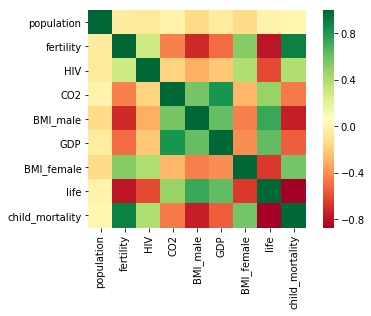

In [19]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')


- [x] The DataFrame has <code>139</code> samples (or rows) and <code>9</code> columns.
- [x] <code>life</code> and <code>fertility</code> are negatively correlated.
- [x] The mean of <code>life</code> is <code>69.602878</code>.
- [ ] <code>fertility</code> is of type <code>int64</code>.
- [x] <code>GDP</code> and <code>life</code> are positively correlated.

## 2-4 The basics of linear regression


(Video)

## 2-5 Fit & predict for regression


<p>Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the <code>&apos;RM&apos;</code> feature of the Boston housing dataset. In this exercise, you will use the <code>&apos;fertility&apos;</code> feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is <code>&apos;life&apos;</code>. The array for the target variable has been pre-loaded as <code>y</code> and the array for <code>&apos;fertility&apos;</code> has been pre-loaded as <code>X_fertility</code>.</p>
<p>A scatter plot with <code>&apos;fertility&apos;</code> on the x-axis and <code>&apos;life&apos;</code> on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the \(R^2\) score using sckit-learn&apos;s <code>.score()</code> method.</p>

<ul>
<li>Import <code>LinearRegression</code> from <code>sklearn.linear_model</code>.</li>
<li>Create a <code>LinearRegression</code> regressor called <code>reg</code>.</li>
<li>Set up the prediction space to range from the minimum to the maximum of <code>X_fertility</code>. This has been done for you.</li>
<li>Fit the regressor to the data (<code>X_fertility</code> and <code>y</code>) and compute its predictions using the <code>.predict()</code> method and the <code>prediction_space</code> array.</li>
<li>Compute and print the \(R^2\) score using the <code>.score()</code> method.</li>
<li>Overlay the plot with your linear regression line. This has been done for you, so hit &apos;Submit Answer&apos; to see the result!</li>
</ul>

0.6192442167740035


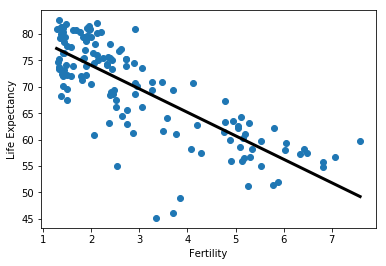

In [30]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.scatter(X_fertility, y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)

plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.show()

Fantastic! Notice how the line captures the underlying trend in the data. And the performance is quite decent for this basic regression model with only one feature!

## 2-6 Train/test split for regression


<p>As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models. </p>
<p>In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over <strong>all</strong> features. In addition to computing the \(R^2\) score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array <code>X</code> and target variable array <code>y</code> have been pre-loaded for you from the DataFrame <code>df</code>.</p>

<ul>
<li>Import <code>LinearRegression</code> from <code>sklearn.linear_model</code>, <code>mean_squared_error</code> from <code>sklearn.metrics</code>, and <code>train_test_split</code> from <code>sklearn.model_selection</code>.</li>
<li>Using <code>X</code> and <code>y</code>, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of <code>42</code>.</li>
<li>Create a linear regression regressor called <code>reg_all</code>, fit it to the training set, and evaluate it on the test set.</li>
<li>Compute and print the \(R^2\) score using the <code>.score()</code> method on the test set.</li>
<li>Compute and print the RMSE. To do this, first compute the Mean Squared Error using the <code>mean_squared_error()</code> function with the arguments <code>y_test</code> and <code>y_pred</code>, and then take its square root using <code>np.sqrt()</code>.</li>
</ul>

In [38]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Read the CSV file into a DataFrame: df
df = pd.read_csv('datasets/boston.csv')

#Get the features
X=df.drop('MEDV', axis=1).values
#Get the target 
y=df['MEDV'].values


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)


# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7112260057484929
Root Mean Squared Error: 4.638689926172822


Excellent! Using all features has improved the model score. This makes sense, as the model has more information to learn from. However, there is one potential pitfall to this process. Can you spot it? You'll learn about this as well how to better validate your models in the next video!

## 2-7 Cross-validation


(video)

## 2-8 5-fold cross-validation

<p>Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.</p>
<p>In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn&apos;s <code>cross_val_score()</code> function uses \(R^2\) as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.</p>
<p>The DataFrame has been loaded as <code>df</code> and split into the feature/target variable arrays <code>X</code> and <code>y</code>. The modules <code>pandas</code> and <code>numpy</code> have been imported as <code>pd</code> and <code>np</code>, respectively.</p>

<ul>
<li>Import <code>LinearRegression</code> from <code>sklearn.linear_model</code> and <code>cross_val_score</code> from <code>sklearn.model_selection</code>.</li>
<li>Create a linear regression regressor called <code>reg</code>.</li>
<li>Use the <code>cross_val_score()</code> function to perform 5-fold cross-validation on <code>X</code> and <code>y</code>.</li>
<li>Compute and print the average cross-validation score. You can use NumPy&apos;s <code>mean()</code> function to compute the average.</li>
</ul>

In [39]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Average 5-Fold CV Score: 0.3532759243958781


## 2-9 K-Fold CV comparison

<p>Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.</p>
<p>In the IPython Shell, you can use <code>%timeit</code> to see how long each 3-fold CV takes compared to 10-fold CV by executing the following <code>cv=3</code> and <code>cv=10</code>:</p>
<pre><code>%timeit cross_val_score(reg, X, y, cv = ____)
</code></pre>
<p><code>pandas</code> and <code>numpy</code> are available in the workspace as <code>pd</code> and <code>np</code>. The DataFrame has been loaded as <code>df</code> and the feature/target variable arrays <code>X</code> and <code>y</code> have been created.</p>

<ul>
<li>Import <code>LinearRegression</code> from <code>sklearn.linear_model</code> and <code>cross_val_score</code> from <code>sklearn.model_selection</code>. </li>
<li>Create a linear regression regressor called <code>reg</code>.</li>
<li>Perform 3-fold CV and then 10-fold CV. Compare the resulting mean scores.</li>
</ul>

In [40]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))


-1.5841985220998402
0.20252899006056305


## 2-10 Regularized regression (Lasso & Ridge)  


(video)

### from video

[-0.09789363  0.04921111 -0.03661906  0.95519003 -0.          3.70320175
 -0.01003698 -1.16053834  0.27470721 -0.01457017 -0.77065434  0.01024917
 -0.56876914]


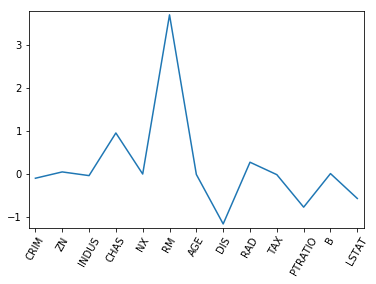

In [60]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('datasets/boston.csv')

#Get the features
X=df.drop('MEDV', axis=1).values
#Get the target 
y=df['MEDV'].values

names=df.drop('MEDV', axis=1).columns

# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=.1)

# Fit the regressor to the data
data=lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = data.coef_
print(lasso_coef)


# Plot the coefficients
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names.values, rotation=60)
plt.margins(0.02)
plt.show()

## 2-11 Regularization I: Lasso


<p>In the video, you saw how Lasso selected out the <code>&apos;RM&apos;</code> feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features. </p>
<p>In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.</p>
<p>The feature and target variable arrays have been pre-loaded as <code>X</code> and <code>y</code>.</p>

<ul>
<li>Import <code>Lasso</code> from <code>sklearn.linear_model</code>.</li>
<li>Instantiate a Lasso regressor with an alpha of <code>0.4</code> and specify <code>normalize=True</code>. </li>
<li>Fit the regressor to the data and compute the coefficients using the <code>coef_</code> attribute.</li>
<li>Plot the coefficients on the y-axis and column names on the x-axis. This has been done for you, so hit &apos;Submit Answer&apos; to view the plot!</li>
</ul>

In [66]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('datasets/gm_2008_region.csv')

X=df[['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female','child_mortality']].values
y=df['life'].values

df_columns=df.drop(['life','Region'], axis=1).columns

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


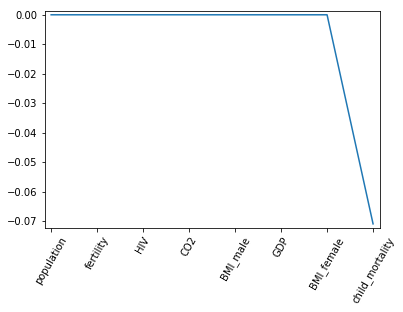

In [67]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=.4, normalize=True)

# Fit the regressor to the data
data=lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = data.coef_
print(lasso_coef)


# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

## 2-12 Regularization II: Ridge


<p>Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.</p>
<p>Recall that lasso performs regularization by adding to the loss function a penalty term of the <em>absolute</em> value of each coefficient multiplied by some alpha. This is also known as \(L1\) regularization because the regularization term is the \(L1\) norm of the coefficients. This is not the only way to regularize, however. </p>
<p>If instead you took the sum of the <em>squared</em> values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the \(L2\) norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated \(R^2\) scores for each, using this function that we have defined for you, which plots the \(R^2\) score as well as standard error for each alpha:</p>
<pre><code>def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
</code></pre>
<p>Don&apos;t worry about the specifics of the above function works. The motivation behind this exercise is for you to see how the \(R^2\) score varies with different alphas, and to understand the importance of selecting the right value for alpha. You&apos;ll learn how to tune alpha in the next chapter.</p>

<ul>
<li>Instantiate a Ridge regressor and specify <code>normalize=True</code>.</li>
<li>Inside the <code>for</code> loop:<ul>
<li>Specify the alpha value for the regressor to use.</li>
<li>Perform 10-fold cross-validation on the regressor with the specified alpha. The data is available in the arrays <code>X</code> and <code>y</code>.</li>
<li>Append the average and the standard deviation of the computed cross-validated scores. NumPy has been pre-imported for you as <code>np</code>.</li></ul></li>
<li>Use the <code>display_plot()</code> function to visualize the scores and standard deviations.</li>
</ul>

In [69]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

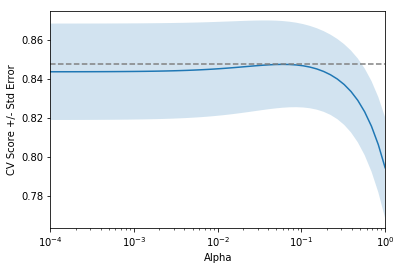

In [70]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X,y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


Great work! Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model? You'll learn all about this in the next chapter!

------------------------------------------------------------------------------------------------------

# 3- Fine-tuning your model 

Having trained your model, your next task is to evaluate its performance. In this chapter, you will learn about some of the other metrics available in scikit-learn that will allow you to assess your model's performance in a more nuanced manner. Next, learn to optimize your classification and regression models using hyperparameter tuning.

## 3-1 Metrics for classification


<p>In Chapter 1, you evaluated the performance of your k-NN classifier based on its accuracy. However, as Andy discussed, accuracy is not always an informative metric. In this exercise, you will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report. </p>
<p>You may have noticed in the video that the classification report consisted of three rows, and an additional <em>support</em> column. The <em>support</em> gives the number of samples of the true response that lie in that class - so in the video example, the support was the number of Republicans or Democrats in the test set on which the classification report was computed. The <em>precision</em>, <em>recall</em>, and <em>f1-score</em> columns, then, gave the respective metrics for that particular class.</p>
<p>Here, you&apos;ll work with the <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database">PIMA Indians</a> dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of <code>0</code> indicates that the patient does <em>not</em> have diabetes, while a value of <code>1</code> indicates that the patient <em>does</em> have diabetes. As in Chapters 1 and 2, the dataset has been preprocessed to deal with missing values.</p>
<p>The dataset has been loaded into a DataFrame <code>df</code> and the feature and target variable arrays <code>X</code> and <code>y</code> have been created for you. In addition, <code>sklearn.model_selection.train_test_split</code> and <code>sklearn.neighbors.KNeighborsClassifier</code> have already been imported.</p>
<p>Your job is to train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.</p>

In [79]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('datasets/diabetes.csv')



#Features
X=df.drop('diabetes', axis=1).values 

#Target
y=df['diabetes'].values

df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<ul>
<li>Import <code>classification_report</code> and <code>confusion_matrix</code> from <code>sklearn.metrics</code>.</li>
<li>Create training and testing sets with 40% of the data used for testing. Use a random state of <code>42</code>.</li>
<li>Instantiate a k-NN classifier with <code>6</code> neighbors, fit it to the training data, and predict the labels of the test set.</li>
<li>Compute and print the confusion matrix and classification report using the <code>confusion_matrix()</code> and <code>classification_report()</code> functions.</li>
</ul>

In [80]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.40, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

   micro avg       0.72      0.72      0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



Excellent work! By analyzing the confusion matrix and classification report, you can get a much better understanding of your classifier's performance.

## 3-2 Logistic regression and the ROC curve


(Video)

## 3-3 Building a logistic regression model


<p>Time to build your first logistic regression model! As Hugo showed in the video, scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as &apos;estimators&apos;. You&apos;ll see this now for yourself as you train a logistic regression model on exactly the same data as in the previous exercise. Will it outperform k-NN? There&apos;s only one way to find out! </p>
<p>The feature and target variable arrays <code>X</code> and <code>y</code> have been pre-loaded, and <code>train_test_split</code> has been imported for you from <code>sklearn.model_selection</code>.</p>

<ul>
<li>Import:<ul>
<li><code>LogisticRegression</code> from <code>sklearn.linear_model</code>.</li>
<li><code>confusion_matrix</code> and <code>classification_report</code> from <code>sklearn.metrics</code>.</li></ul></li>
<li>Create training and test sets with 40% (or <code>0.4</code>) of the data used for testing. Use a random state of <code>42</code>. This has been done for you.</li>
<li>Instantiate a <code>LogisticRegression</code> classifier called <code>logreg</code>.</li>
<li>Fit the classifier to the training data and predict the labels of the test set.</li>
<li>Compute and print the confusion matrix and classification report. This has been done for you, so hit &apos;Submit Answer&apos; to see how logistic regression compares to k-NN!</li>
</ul>

In [81]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[174  32]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

   micro avg       0.78      0.78      0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



You now know how to use logistic regression for binary classification - great work! Logistic regression is used in a variety of machine learning applications and will become a vital part of your data science toolbox.

## 3-4 Plotting an ROC curve


<p>Great job in the previous exercise - you now have a new addition to your toolbox of classifiers! </p>
<p>Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. As Hugo demonstrated in the video, most classifiers in scikit-learn have a <code>.predict_proba()</code> method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you&apos;ll now evaluate its performance by plotting an ROC curve. In doing so, you&apos;ll make use of the <code>.predict_proba()</code> method and become familiar with its functionality. </p>
<p>Here, you&apos;ll continue working with the PIMA Indians diabetes dataset. The classifier has already been fit to the training data and is available as <code>logreg</code>.</p>

<ul>
<li>Import <code>roc_curve</code> from <code>sklearn.metrics</code>.</li>
<li>Using the <code>logreg</code> classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set <code>X_test</code>. Save the result as <code>y_pred_prob</code>.</li>
<li>Use the <code>roc_curve()</code> function with <code>y_test</code> and <code>y_pred_prob</code> and unpack the result into the variables <code>fpr</code>, <code>tpr</code>, and <code>thresholds</code>.</li>
<li>Plot the ROC curve with <code>fpr</code> on the x-axis and <code>tpr</code> on the y-axis.</li>
</ul>

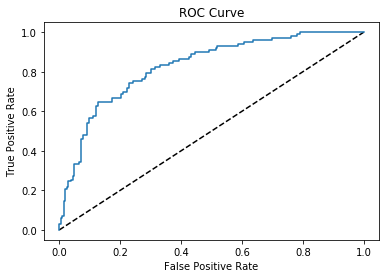

In [82]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## 3-5 Precision-recall Curve


<p>When looking at your ROC curve, you may have noticed that the y-axis (True positive rate) is also known as recall. Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance. One such way is the precision-recall curve, which is generated by plotting the precision and recall for different thresholds. As a reminder, precision and recall are defined as:</p>
<p>$$ Precision = \frac{TP}{TP+FP} $$</p>
<p>$$ Recall = \frac{TP}{TP+FN} $$</p>
<p>On the right, a precision-recall curve has been generated for the diabetes dataset. The classification report and confusion matrix are displayed in the IPython Shell.</p>
<p>Study the precision-recall curve and then consider the statements given below. Choose the one statement that is <strong>not</strong> true. Note that here, the class is positive (1) if the individual <em>has</em> diabetes.</p>

<img src="download.svg"/>

- [ ] A recall of 1 corresponds to a classifier with a low threshold in which all females who contract diabetes were correctly classified as such, at the expense of many misclassifications of those who did not have diabetes.
- [ ] Precision is undefined for a classifier which makes no positive predictions, that is, classifies everyone as not having diabetes.
- [ ] When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions.
- [x] Precision and recall take true negatives into consideration.

Great work! True negatives do not appear at all in the definitions of precision and recall.

## 3-6 Area under the ROC curve


(video)

## 3-7 AUC computation

<p>Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC, which Hugo discussed in the video, is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!  </p>
<p>In this exercise, you&apos;ll calculate AUC scores using the <code>roc_auc_score()</code> function from <code>sklearn.metrics</code> as well as by performing cross-validation on the diabetes dataset. </p>
<p><code>X</code> and <code>y</code>, along with training and test sets <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, <code>y_test</code>, have been pre-loaded for you, and a logistic regression classifier <code>logreg</code> has been fit to the training data.</p>

<ul>
<li>Import <code>roc_auc_score</code> from <code>sklearn.metrics</code> and <code>cross_val_score</code> from <code>sklearn.model_selection</code>.</li>
<li>Using the <code>logreg</code> classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set <code>X_test</code>. Save the result as <code>y_pred_prob</code>.</li>
<li>Compute the AUC score using the <code>roc_auc_score()</code> function, the test set labels <code>y_test</code>, and the predicted probabilities <code>y_pred_prob</code>.</li>
<li>Compute the AUC scores by performing 5-fold cross-validation. Use the <code>cross_val_score()</code> function and specify the <code>scoring</code> parameter to be <code>&apos;roc_auc&apos;</code>.</li>
</ul>

In [86]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, scoring='roc_auc',cv=5)

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.8268608414239482
AUC scores computed using 5-fold cross-validation: [0.79888889 0.80777778 0.81944444 0.86622642 0.85037736]


C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed

## 3-8 Hyperparameter tuning


(video)

## 3-9 Hyperparameter tuning with GridSearchCV


<p>Hugo demonstrated how to tune the <code>n_neighbors</code> parameter of the <code>KNeighborsClassifier()</code> using GridSearchCV on the voting dataset. You will now practice this yourself, but by using logistic regression on the diabetes dataset instead! </p>
<p>Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: \(C\). \(C\) controls the <em>inverse</em> of the regularization strength, and this is what you will tune in this exercise. A large \(C\) can lead to an <em>overfit</em> model, while a small \(C\) can lead to an <em>underfit</em> model.</p>
<p>The hyperparameter space for \(C\) has been setup for you. Your job is to use GridSearchCV and logistic regression to find the optimal \(C\) in this hyperparameter space. The feature array is available as <code>X</code> and target variable array is available as <code>y</code>.</p>
<p>You may be wondering why you aren&apos;t asked to split the data into training and test sets. Good observation! Here, we want you to focus on the process of setting up the hyperparameter grid and performing grid-search cross-validation. In practice, you will indeed want to hold out a portion of your data for evaluation purposes, and you will learn all about this in the next video!</p>

<ul>
<li>Import <code>LogisticRegression</code> from <code>sklearn.linear_model</code> and <code>GridSearchCV</code> from <code>sklearn.model_selection</code>.</li>
<li>Setup the hyperparameter grid by using <code>c_space</code> as the grid of values to tune \(C\) over.</li>
<li>Instantiate a logistic regression classifier called <code>logreg</code>.</li>
<li>Use <code>GridSearchCV</code> with 5-fold cross-validation to tune \(C\):<ul>
<li>Inside <code>GridSearchCV()</code>, specify the classifier, parameter grid, and number of folds to use.</li>
<li>Use the <code>.fit()</code> method on the <code>GridSearchCV</code> object to fit it to the data <code>X</code> and <code>y</code>.</li></ul></li>
<li>Print the best parameter and best score obtained from <code>GridSearchCV</code> by accessing the <code>best_params_</code> and <code>best_score_</code> attributes of <code>logreg_cv</code>.</li>
</ul>

In [87]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed

C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed

Tuned Logistic Regression Parameters: {'C': 1389495.494373136}
Best score is 0.7721354166666666


C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 3-10 Hyperparameter tuning with RandomizedSearchCV

<p>GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use <code>RandomizedSearchCV</code>, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You&apos;ll practice using <code>RandomizedSearchCV</code> in this exercise and see how this works.</p>
<p>Here, you&apos;ll also be introduced to a new model: the Decision Tree. Don&apos;t worry about the specifics of how this model works. Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have <code>.fit()</code> and <code>.predict()</code> methods that you can use in exactly the same way as before. Decision trees have many parameters that can be tuned, such as <code>max_features</code>, <code>max_depth</code>, and <code>min_samples_leaf</code>: This makes it an ideal use case for <code>RandomizedSearchCV</code>. </p>
<p>As before, the feature array <code>X</code> and target variable array <code>y</code> of the diabetes dataset have been pre-loaded. The hyperparameter settings have been specified for you. Your goal is to use <code>RandomizedSearchCV</code> to find the optimal hyperparameters. Go for it!</p>

<ul>
<li>Import <code>DecisionTreeClassifier</code> from <code>sklearn.tree</code> and <code>RandomizedSearchCV</code> from <code>sklearn.model_selection</code>.</li>
<li>Specify the parameters and distributions to sample from. This has been done for you.</li>
<li>Instantiate a <code>DecisionTreeClassifier</code>.</li>
<li>Use <code>RandomizedSearchCV</code> with 5-fold cross-validation to tune the hyperparameters:<ul>
<li>Inside <code>RandomizedSearchCV()</code>, specify the classifier, parameter distribution, and number of folds to use.</li>
<li>Use the <code>.fit()</code> method on the <code>RandomizedSearchCV</code> object to fit it to the data <code>X</code> and <code>y</code>.</li></ul></li>
<li>Print the best parameter and best score obtained from <code>RandomizedSearchCV</code> by accessing the <code>best_params_</code> and <code>best_score_</code> attributes of <code>tree_cv</code>.</li>
</ul>

In [88]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 6}
Best score is 0.7447916666666666


Great work! You'll see a lot more of decision trees and RandomizedSearchCV as you continue your machine learning journey. Note that RandomizedSearchCV will never outperform GridSearchCV. Instead, it is valuable because it saves on computation time.

## 3-11 Hold-out set for final evaluation


(video)

## 3-12 Hold-out set in practice I: Classification

<p>You will now practice evaluating a model with tuned hyperparameters on a hold-out set. The feature array and target variable array from the diabetes dataset have been pre-loaded as <code>X</code> and <code>y</code>. </p>
<p>In addition to \(C\), logistic regression has a <code>&apos;penalty&apos;</code> hyperparameter which specifies whether to use <code>&apos;l1&apos;</code> or <code>&apos;l2&apos;</code> regularization. Your job in this exercise is to create a hold-out set, tune the <code>&apos;C&apos;</code> and <code>&apos;penalty&apos;</code> hyperparameters of a logistic regression classifier using <code>GridSearchCV</code> on the training set.</p>

<ul>
<li>Create the hyperparameter grid:<ul>
<li>Use the array <code>c_space</code> as the grid of values for <code>&apos;C&apos;</code>.</li>
<li>For <code>&apos;penalty&apos;</code>, specify a list consisting of <code>&apos;l1&apos;</code> and <code>&apos;l2&apos;</code>.</li></ul></li>
<li>Instantiate a logistic regression classifier.</li>
<li>Create training and test sets. Use a <code>test_size</code> of <code>0.4</code> and <code>random_state</code> of <code>42</code>. In practice, the test set here will function as the hold-out set.</li>
<li>Tune the hyperparameters on the training set using <code>GridSearchCV</code> with 5-folds. This involves first instantiating the <code>GridSearchCV</code> object with the correct parameters and then fitting it to the training data.</li>
<li>Print the best parameter and best score obtained from <code>GridSearchCV</code> by accessing the <code>best_params_</code> and <code>best_score_</code> attributes of <code>logreg_cv</code>.</li>
</ul>

In [90]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed

C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed

C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261


C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed

## 3-12 Hold-out set in practice II: Regression

<p>Remember lasso and ridge regression from the previous chapter? Lasso used the \(L1\) penalty to regularize, while ridge used the \(L2\) penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the \(L1\) and \(L2\) penalties:</p>
<p>$$ a * L1 + b * L2 $$</p>
<p>In scikit-learn, this term is represented by the <code>&apos;l1_ratio&apos;</code> parameter: An <code>&apos;l1_ratio&apos;</code> of <code>1</code> corresponds to an \(L1\) penalty, and anything lower is a combination of \(L1\) and \(L2\).</p>
<p>In this exercise, you will <code>GridSearchCV</code> to tune the <code>&apos;l1_ratio&apos;</code> of an elastic net model trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model&apos;s performance.</p>

<ul>
<li>Import the following modules:<ul>
<li><code>ElasticNet</code> from <code>sklearn.linear_model</code>.</li>
<li><code>mean_squared_error</code> from <code>sklearn.metrics</code>.</li>
<li><code>GridSearchCV</code> and <code>train_test_split</code> from <code>sklearn.model_selection</code>.</li></ul></li>
<li>Create training and test sets, with 40% of the data used for the test set. Use a random state of <code>42</code>.</li>
<li>Specify the hyperparameter grid for <code>&apos;l1_ratio&apos;</code> using <code>l1_space</code> as the grid of values to search over.</li>
<li>Instantiate the <code>ElasticNet</code> regressor. </li>
<li>Use <code>GridSearchCV</code> with 5-fold cross-validation to tune <code>&apos;l1_ratio&apos;</code> on the training data <code>X_train</code> and <code>y_train</code>. This involves first instantiating the <code>GridSearchCV</code> object with the correct parameters and then fitting it to the training data.</li>
<li>Predict on the test set and compute the \(R^2\) and mean squared error.</li>
</ul>

In [91]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('datasets/gm_2008_region.csv')

X=df[['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female','child_mortality']].values
y=df['life'].values

In [92]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_pred, y_test)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective di

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460284
Tuned ElasticNet MSE: 10.057914133398437


C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fantastic! Now that you understand how to fine-tune your models, it's time to learn about preprocessing techniques and how to piece together all the different stages of the machine learning process into a pipeline!

-----------------------------------------------------------------------------------------------------

# 4- Preprocessing and pipelines

This chapter introduces pipelines, and how scikit-learn allows for transformers and estimators to be chained together and used as a single unit. Preprocessing techniques will be introduced as a way to enhance model performance, and pipelines will tie together concepts from previous chapters.

## 4-1 Preprocessing data


(video)

## 4-2 Exploring categorical features


<p>The Gapminder dataset that you worked with in previous chapters also contained a categorical <code>&apos;Region&apos;</code> feature, which we dropped in previous exercises since you did not have the tools to deal with it. Now however, you do, so we have added it back in! </p>
<p>Your job in this exercise is to explore this feature. Boxplots are particularly useful for visualizing categorical features such as this.</p>

<ul>
<li>Import <code>pandas</code> as <code>pd</code>.</li>
<li>Read the CSV file <code>&apos;gapminder.csv&apos;</code> into a DataFrame called <code>df</code>.</li>
<li>Use pandas to create a boxplot showing the variation of life expectancy (<code>&apos;life&apos;</code>) by region (<code>&apos;Region&apos;</code>). To do so, pass the column names in to <code>df.boxplot()</code> (in that order).</li>
</ul>

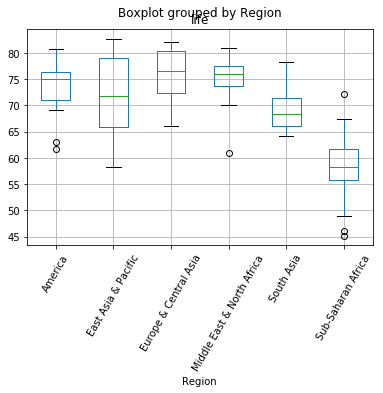

In [93]:
# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('datasets/gm_2008_region.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()


## 4-2 Creating dummy variables


<p>As Andy discussed in the video, scikit-learn does not accept non-numerical features. You saw in the previous exercise that the <code>&apos;Region&apos;</code> feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy, it would be preferable to retain the <code>&apos;Region&apos;</code> feature. To do this, you need to binarize it by creating dummy variables, which is what you will do in this exercise.</p>

<ul>
<li>Use the pandas <code>get_dummies()</code> function to create dummy variables from the <code>df</code> DataFrame. Store the result as <code>df_region</code>.</li>
<li>Print the columns of <code>df_region</code>. This has been done for you.</li>
<li>Use the <code>get_dummies()</code> function again, this time specifying <code>drop_first=True</code> to drop the unneeded dummy variable (in this case, <code>&apos;Region_America&apos;</code>).</li>
<li>Hit &apos;Submit Answer to print the new columns of <code>df_region</code> and take note of how one column was dropped!</li>
</ul>

In [94]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)


Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


Excellent! Now that you have created the dummy variables, you can use the 'Region' feature to predict life expectancy!

## 4-3 Regression with categorical features


<p>Having created the dummy variables from the <code>&apos;Region&apos;</code> feature, you can build regression models as you did before. Here, you&apos;ll use ridge regression to perform 5-fold cross-validation.</p>
<p>The feature array <code>X</code> and target variable array <code>y</code> have been pre-loaded.</p>

<ul>
<li>Import <code>Ridge</code> from <code>sklearn.linear_model</code> and <code>cross_val_score</code> from <code>sklearn.model_selection</code>.</li>
<li>Instantiate a ridge regressor called <code>ridge</code> with <code>alpha=0.5</code> and <code>normalize=True</code>.</li>
<li>Perform 5-fold cross-validation on <code>X</code> and <code>y</code> using the <code>cross_val_score()</code> function.</li>
<li>Print the cross-validated scores.</li>
</ul>

In [95]:
X=df_region.drop('life', axis=1).values
y=df_region['life'].values

In [97]:
df_region.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


In [98]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,X,y, cv=5)

# Print the cross-validated scores
print(ridge_cv)


[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


Excellent! You now know how to build models using data that includes categorical features.

## 4-4 Handling missing data


(video)

## 4-5 Dropping missing data


<p>The voting dataset from Chapter 1 contained a bunch of missing values that we dealt with for you behind the scenes. Now, it&apos;s time for you to take care of these yourself!</p>
<p>The unprocessed dataset has been loaded into a DataFrame <code>df</code>. Explore it in the IPython Shell with the <code>.head()</code> method. You will see that there are certain data points labeled with a <code>&apos;?&apos;</code>. These denote missing values. As you saw in the video, different datasets encode missing values in different ways. Sometimes it may be a <code>&apos;9999&apos;</code>, other times  a <code>0</code> - real-world data can be very messy! If you&apos;re lucky, the missing values will already be encoded as <code>NaN</code>. We use <code>NaN</code> because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as <code>.dropna()</code> and <code>.fillna()</code>, as well as scikit-learn&apos;s Imputation transformer <code>Imputer()</code>.</p>
<p>In this exercise, your job is to convert the <code>&apos;?&apos;</code>s to NaNs, and then drop the rows that contain them from the DataFrame.</p>

In [107]:
#First I will explore the data then convert to be Just like in DataCamp, to do the exercise

df=pd.read_csv('datasets/vote_csv.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
handicapped-infants                       423 non-null object
water-project-cost-sharing                387 non-null object
adoption-of-the-budget-resolution         424 non-null object
physician-fee-freeze                      424 non-null object
el-salvador-aid                           420 non-null object
religious-groups-in-schools               424 non-null object
anti-satellite-test-ban                   421 non-null object
aid-to-nicaraguan-contras                 420 non-null object
mx-missile                                413 non-null object
immigration                               428 non-null object
synfuels-corporation-cutback              414 non-null object
education-spending                        404 non-null object
superfund-right-to-sue                    410 non-null object
crime                                     418 non-null object
duty-free-exports          

In [108]:
df.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN,republican
2,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y,democrat


In [110]:
#Do Some pre-prossing 
# Replace the 'n' with 0 and 'y' with 1
df=df.replace('n',0)
df=df.replace('y',1)
df=df.replace(np.NaN, '?')
df.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1,republican
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?,republican
2,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0,democrat
3,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1,democrat
4,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1,democrat


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
handicapped-infants                       435 non-null object
water-project-cost-sharing                435 non-null object
adoption-of-the-budget-resolution         435 non-null object
physician-fee-freeze                      435 non-null object
el-salvador-aid                           435 non-null object
religious-groups-in-schools               435 non-null object
anti-satellite-test-ban                   435 non-null object
aid-to-nicaraguan-contras                 435 non-null object
mx-missile                                435 non-null object
immigration                               435 non-null object
synfuels-corporation-cutback              435 non-null object
education-spending                        435 non-null object
superfund-right-to-sue                    435 non-null object
crime                                     435 non-null object
duty-free-exports          

-----------

<ul>
<li>Explore the DataFrame <code>df</code> in the IPython Shell. Notice how the missing value is represented.</li>
<li>Convert all <code>&apos;?&apos;</code> data points to <code>np.nan</code>.</li>
<li>Count the total number of NaNs using the <code>.isnull()</code> and <code>.sum()</code> methods. This has been done for you.</li>
<li>Drop the rows with missing values from <code>df</code> using <code>.dropna()</code>.</li>
<li>Hit &apos;Submit Answer&apos; to see how many rows were lost by dropping the missing values.</li>
</ul>

In [112]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))


handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
Class                                       0
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


Great work! When many values in your dataset are missing, if you drop them, you may end up throwing away valuable information along with the missing data. It's better instead to develop an imputation strategy. This is where domain knowledge is useful, but in the absence of it, you can impute missing values with the mean or the median of the row or column that the missing value is in.

## 4-6 Imputing missing data in a ML Pipeline I

<p>As you&apos;ve come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow. </p>
<p>You&apos;ll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. You&apos;ve seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. You will now be introduced to a fourth one - the Support Vector Machine, or <a href="http://scikit-learn.org/stable/modules/svm.html">SVM</a>. For now, do not worry about how it works under the hood. It works exactly as you would expect of the scikit-learn estimators that you have worked with previously, in that it has the same <code>.fit()</code> and <code>.predict()</code> methods as before.</p>

<ul>
<li>Import <code>Imputer</code> from <code>sklearn.preprocessing</code> and <code>SVC</code> from <code>sklearn.svm</code>. SVC stands for Support Vector Classification, which is a type of SVM.</li>
<li>Setup the Imputation transformer to impute missing data (represented as <code>&apos;NaN&apos;</code>) with the <code>&apos;most_frequent&apos;</code> value in the column (<code>axis=0</code>).</li>
<li>Instantiate a <code>SVC</code> classifier. Store the result in <code>clf</code>.</li>
<li>Create the steps of the pipeline by creating a list of tuples:<ul>
<li>The first tuple should consist of the imputation step, using <code>imp</code>.</li>
<li>The second should consist of the classifier.</li></ul></li>
</ul>

In [115]:
# Import the Imputer module
from sklearn.preprocessing import Imputer 
from sklearn.svm import SVC



# Setup the Imputation transformer: imp
imp=Imputer(missing_values='NaN', strategy='most_frequent', axis=0)


# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]


C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Fantastic! Having set up the pipeline steps, you can now use it for classification.

## 4-7 Imputing missing data in a ML Pipeline II

<p>Having setup the steps of the pipeline in the previous exercise, you will now use it on the voting dataset to classify a Congressman&apos;s party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide. You can use the <code>.fit()</code> and <code>.predict()</code> methods on pipelines just as you did with your classifiers and regressors! </p>
<p>Practice this for yourself now and generate a classification report of your predictions. The steps of the pipeline have been set up for you, and the feature array <code>X</code> and target variable array <code>y</code> have been pre-loaded. Additionally, <code>train_test_split</code> and <code>classification_report</code> have been imported from <code>sklearn.model_selection</code> and <code>sklearn.metrics</code> respectively.</p>

<ul>
<li>Import the following modules:<ul>
<li><code>Imputer</code> from <code>sklearn.preprocessing</code> and <code>Pipeline</code> from <code>sklearn.pipeline</code>.</li>
<li><code>SVC</code> from <code>sklearn.svm</code>.</li></ul></li>
<li>Create the pipeline using <code>Pipeline()</code> and <code>steps</code>.</li>
<li>Create training and test sets. Use 30% of the data for testing and a random state of <code>42</code>.</li>
<li>Fit the pipeline to the training set and predict the labels of the test set.</li>
<li>Compute the classification report.</li>
</ul>

In [117]:
#The df is from section 4-5
y = df['Class'].values
X = df.drop('Class', axis=1).values

In [118]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

    democrat       0.97      0.97      0.97        36
  republican       0.97      0.97      0.97        34

   micro avg       0.97      0.97      0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70



## 4-8 Centering and scaling


(video)

## 4-9 Centering and scaling your data

<p>In the video, Hugo demonstrated how significantly the performance of a model can improve if the features are scaled. Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact.</p>
<p>You will now explore scaling for yourself on a new dataset - <a href="https://archive.ics.uci.edu/ml/datasets/Wine+Quality">White Wine Quality</a>! Hugo used the Red Wine Quality dataset in the video. We have used the <code>&apos;quality&apos;</code> feature of the wine to create a binary target variable: If <code>&apos;quality&apos;</code> is less than <code>5</code>, the target variable is <code>1</code>, and otherwise, it is <code>0</code>.</p>
<p>The DataFrame has been pre-loaded as <code>df</code>, along with the feature and target variable arrays <code>X</code> and <code>y</code>. Explore it in the IPython Shell. Notice how some features seem to have different units of measurement. <code>&apos;density&apos;</code>, for instance, takes values between 0.98 and 1.04, while <code>&apos;total sulfur dioxide&apos;</code> ranges from 9 to 440. As a result, it may be worth scaling the features here. Your job in this exercise is to scale the features and compute the mean and standard deviation of the unscaled features compared to the scaled features.</p>

<ul>
<li>Import <code>scale</code> from <code>sklearn.preprocessing</code>.</li>
<li>Scale the features <code>X</code> using <code>scale()</code>.</li>
<li>Print the mean and standard deviation of the unscaled features <code>X</code>, and then the scaled features <code>X_scaled</code>. Use the numpy functions <code>np.mean()</code> and <code>np.std()</code> to compute the mean and standard deviations.</li>
</ul>

In [ ]:
df=pd.read_csv('datasets/winequality-red.csv')
y = df['quality'].values
X = df.drop('quality', axis=1).values

In [125]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 0.5223599137931034
Standard Deviation of Unscaled Features: 0.4994997840391597
Mean of Scaled Features: -8.733435430779787e-18
Standard Deviation of Scaled Features: 1.0


C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


## 4-10 Centering and scaling in a pipeline

<p>With regard to whether or not scaling is effective, the proof is in the pudding! See for yourself whether or not scaling the features of the White Wine Quality dataset has any impact on its performance. You will use a k-NN classifier as part of a pipeline that includes scaling, and for the purposes of comparison, a k-NN classifier trained on the unscaled data has been provided. </p>
<p>The feature array and target variable array have been pre-loaded as <code>X</code> and <code>y</code>. Additionally, <code>KNeighborsClassifier</code> and <code>train_test_split</code> have been imported from <code>sklearn.neighbors</code> and <code>sklearn.model_selection</code>, respectively.</p>

<ul>
<li>Import the following modules:<ul>
<li><code>StandardScaler</code> from <code>sklearn.preprocessing</code>.</li>
<li><code>Pipeline</code> from <code>sklearn.pipeline</code>.</li></ul></li>
<li>Complete the steps of the pipeline with <code>StandardScaler()</code> for <code>&apos;scaler&apos;</code> and <code>KNeighborsClassifier()</code> for <code>&apos;knn&apos;</code>.</li>
<li>Create the pipeline using <code>Pipeline()</code> and <code>steps</code>.</li>
<li>Create training and test sets, with 30% used for testing. Use a random state of <code>42</code>.</li>
<li>Fit the pipeline to the training set.</li>
<li>Compute the accuracy scores of the scaled and unscaled models by using the <code>.score()</code> method inside the provided <code>print()</code> functions.</li>
</ul>

In [127]:
df=pd.read_csv('datasets/white-wine.csv')
y = df['quality'].values
X = df.drop('quality', axis=1).values

In [129]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [130]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))


Accuracy with Scaling: 0.5496598639455782
Accuracy without Scaling: 0.47551020408163264


## 4-11 Bringing it all together I: Pipeline for classification

<p>It is time now to piece together everything you have learned so far into a pipeline for classification! Your job in this exercise is to build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.</p>
<p>You&apos;ll return to using the SVM classifier you were briefly introduced to earlier in this chapter. The hyperparameters you will tune are \(C\) and \(gamma\). \(C\) controls the regularization strength. It is analogous to the \(C\) you tuned for logistic regression in Chapter 3, while \(gamma\) controls the kernel coefficient: Do not worry about this now as it is beyond the scope of this course. </p>
<p>The following modules and functions have been pre-loaded: <code>Pipeline</code>, <code>SVC</code>, <code>train_test_split</code>, <code>GridSearchCV</code>, <code>classification_report</code>, <code>accuracy_score</code>. The feature and target variable arrays <code>X</code> and <code>y</code> have also been pre-loaded.</p>

<ul>
<li>Setup the pipeline with the following steps:<ul>
<li>Scaling, called <code>&apos;scaler&apos;</code> with <code>StandardScaler()</code>.</li>
<li>Classification, called <code>&apos;SVM&apos;</code> with <code>SVC()</code>.</li></ul></li>
<li>Specify the hyperparameter space using the following notation: <code>&apos;step_name__parameter_name&apos;</code>. Here, the <code>step_name</code> is <code>SVM</code>, and the <code>parameter_name</code>s are <code>C</code> and <code>gamma</code>.</li>
<li>Create training and test sets, with 20% of the data used for the test set. Use a random state of <code>21</code>.</li>
<li>Instantiate <code>GridSearchCV</code> with the pipeline and hyperparameter space and fit it to the training set. Use 3-fold cross-validation (This is the default, so you don&apos;t have to specify it).</li>
<li>Predict the labels of the test set and compute the metrics. The metrics have been computed for you.</li>
</ul>

In [131]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.5857142857142857
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.40      0.29      0.33        28
           5       0.62      0.59      0.60       289
           6       0.60      0.72      0.65       447
           7       0.53      0.38      0.44       177
           8       0.33      0.13      0.19        38

   micro avg       0.59      0.59      0.59       980
   macro avg       0.41      0.35      0.37       980
weighted avg       0.57      0.59      0.57       980

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}


C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 4-12 Bringing it all together II: Pipeline for regression

<p>For this final exercise, you will return to the Gapminder dataset. Guess what? Even this dataset has missing values that we dealt with for you in earlier chapters! Now, you have all the tools to take care of them yourself! </p>
<p>Your job is to build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data. You will then tune the <code>l1_ratio</code> of your ElasticNet using GridSearchCV.</p>
<p>All the necessary modules have been imported, and the feature and target variable arrays have been pre-loaded as <code>X</code> and <code>y</code>.</p>

<ul>
<li>Set up a pipeline with the following steps:<ul>
<li><code>&apos;imputation&apos;</code>, which uses the <code>Imputer()</code> transformer and the <code>&apos;mean&apos;</code> strategy to impute missing data (<code>&apos;NaN&apos;</code>) using the mean of the column.</li>
<li><code>&apos;scaler&apos;</code>, which scales the features using <code>StandardScaler()</code>.</li>
<li><code>&apos;elasticnet&apos;</code>, which instantiates an <code>ElasticNet()</code> regressor.</li></ul></li>
<li>Specify the hyperparameter space for the \(l1\) ratio using the following notation: <code>&apos;step_name__parameter_name&apos;</code>. Here, the <code>step_name</code> is <code>elasticnet</code>, and the <code>parameter_name</code> is <code>l1_ratio</code>.</li>
<li>Create training and test sets, with 40% of the data used for the test set. Use a random state of <code>42</code>.</li>
<li>Instantiate <code>GridSearchCV</code> with the pipeline and hyperparameter space. Use 3-fold cross-validation (This is the default, so you don&apos;t have to specify it).</li>
<li>Fit the <code>GridSearchCV</code> object to the training set.</li>
<li>Compute \(R^2\) and the best parameters. This has been done for you, so hit &apos;Submit Answer&apos; to see the results!</li>
</ul>

In [132]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('datasets/gm_2008_region.csv')

X=df[['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female','child_mortality']].values
y=df['life'].values


In [133]:
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))


C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: C

C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: Depre

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888217


C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: Depre

## Fantastic work! You have now mastered the fundamentals of supervised learning with scikit-learn!